In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [8]:

df = pd.read_csv('/content/gdrive/MyDrive/ICPLab10/imdb_master.csv', encoding='latin-1')
print(df.head())
sentences = df['review'].values
# Calculating the maximum words in a sentence
maxWords = max([len(s.split()) for s in sentences])
y = df['label'].values

# Tokenizing the data
tokenizer = Tokenizer(num_words=maxWords)
tokenizer.fit_on_texts(sentences)

# Getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
vocab_size = len(tokenizer.word_index) + 1
padded_docs = pad_sequences(sentences, maxlen=maxWords)

# Converting the target into numerical format
labelEncoder = preprocessing.LabelEncoder()
y = labelEncoder.fit_transform(y)
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Defining the model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=maxWords))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Training the model for 5 epochs
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)


   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
Epoch 1/5
293/293 [==============================] - 32s 108ms/step - loss: 1.2664 - acc: 0.4819 - val_loss: 0.8482 - val_acc: 0.5116
Epoch 2/5
293/293 [==============================] - 31s 107ms/step - loss: 0.8259 - acc: 0.5332 - val_loss: 0.8316 - val_acc: 0.5141
Epoch 3/5
293/293 [==============================] - 31s 106ms/step - loss: 0.7924 - acc: 0.5603 - val_loss: 0.8325 - val_acc: 0.5244
Epoch 4/5
293/293 [==============================] - 31s 107ms/step - loss: 0.7726 - acc: 0.5807 - val_loss: 0.8385 - val_acc: 0.5167
Epoch 5/5
293/293 [==============================] - 31s 107ms/step - loss: 0.7392 - acc: 0.6118 - val_loss: 0.8460 - val_acc: 0.5135


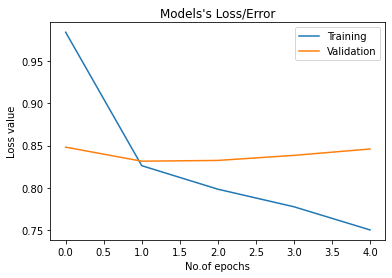

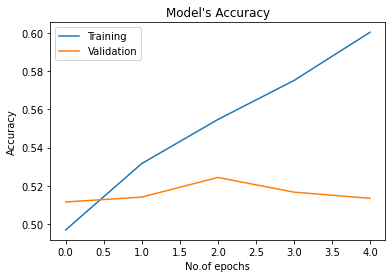

In [10]:
# Models Loss/Error value during training phase
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Models's Loss/Error")
plt.legend(["Training", "Validation"])
plt.xlabel("No.of epochs")
plt.ylabel("Loss value")
plt.show()

# Models Accuracy during training phase
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model's Accuracy")
plt.legend(['Training', 'Validation'])
plt.xlabel('No.of epochs')
plt.ylabel("Accuracy")
plt.show()

In [11]:
# Predicting the Value for test sample
pred = model.predict_classes(X_test[[10],:])
print("The Model prediction for 10th sentence is: ",pred)
print("The correct Lable is: ",y_test[10])

The Model prediction for 10th sentence is:  [0]
The correct Lable is:  0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
